### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from matplotlib import pyplot as plt 
import numpy as np

TensorFlow 2.x selected.


In [2]:
tf.__version__

'2.1.0-rc1'

#### Collect Fashion mnist data from tf.keras.datasets 

In [3]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_test.shape

(10000,)

#### Change train and test labels into one-hot vectors

In [0]:
y_train_cat=tf.keras.utils.to_categorical(y_train,num_classes=None,dtype='float32')
y_test_cat=tf.keras.utils.to_categorical(y_test,num_classes=None,dtype='float32')

#### Build the Graph

#### Initialize model, reshape & normalize data

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model1 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model1.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model1.add(tf.keras.layers.BatchNormalization())

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [0]:
#Add 1st hidden layer
model1.add(tf.keras.layers.Dense(200, activation='relu'))
model1.add(tf.keras.layers.Dense(100, activation='relu'))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Dropout(0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [0]:
#Add OUTPUT layer
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#Compile the model

model1.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [13]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [14]:
model1.fit(x_train,y_train_cat,          
          validation_data=(x_test,y_test_cat),
          epochs=10,
          batch_size=64)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.5018 - accuracy: 0.8214 - val_loss: 0.4122 - val_accuracy: 0.8461
Epoch 2/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3751 - accuracy: 0.8647 - val_loss: 0.3613 - val_accuracy: 0.8678
Epoch 3/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.3362 - accuracy: 0.8759 - val_loss: 0.3632 - val_accuracy: 0.8691
Epoch 4/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.3137 - accuracy: 0.8851 - val_loss: 0.3462 - val_accuracy: 0.8741
Epoch 5/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2933 - accuracy: 0.8930 - val_loss: 0.3438 - val_accuracy: 0.8768
Epoch 6/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2771 - accuracy: 0.8978 - val_loss: 0.3531 - val_accuracy: 0.8786
Epoch 7/10
60000/60000 [=============================

In [0]:
class_names = ['T-shirt', 'Trouser', 'Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']


In [0]:
predictions = model1.predict(x_train)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color='blue')

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(9), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='green')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

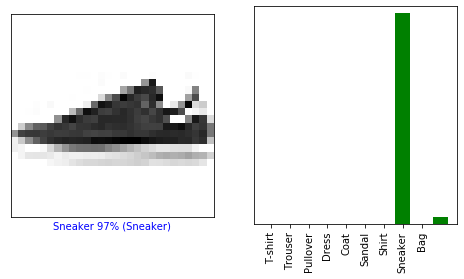

In [23]:
#Replace value of i with other index to check other product
i = 6
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_train, x_train)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_train)
plt.show()

In [0]:
#So from above validation we can say that model is predciting some what correctly